In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir("C:\\code\\activ")

In [3]:
df = pd.read_excel('./documents/feature.xlsx')

In [4]:
ACTION_NUM = 5

In [5]:
def make_dataset(training_data, t=12, k=200, test_size=0.2):
    scaler = MinMaxScaler()
    training_data = scaler.fit_transform(training_data.to_numpy()[:,1::])

    p = []
    for i in range(ACTION_NUM):
        idx = rand.randint(0, len(training_data)-k-t)

        X = []
        y = []
        for ii in range(t, k-t):
            X.append(training_data[idx+ii-t:idx+ii])
            y.append(training_data[idx+ii+1])

        X = np.array(X)
        y = np.array(y)
        X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
        p.append([X_train,X_test,y_train,y_test])

    return p
p = make_dataset(df)

In [6]:
class my_model(tf.keras.Model):
    def __init__(self):
        super(my_model, self).__init__()
        self.d1 = tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=True)
        self.d2 = tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=True)
        self.d3 = tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=False)
        self.d4 = tf.keras.layers.Dense(units=21, activation='linear')
    def call(self, inputs):
        x = self.d1(inputs)
        x = self.d2(x)
        x = self.d3(x)
        x = self.d4(x)

        return x

In [7]:
model_1 = my_model()
model_2 = my_model()
model_3 = my_model()
model_4 = my_model()
model_5 = my_model()

In [8]:
model_list = [model_1,model_2,model_3,model_4,model_5]

In [9]:
for i in range(5):
    model_list[i].build(input_shape=(1, 12, 21))
    model_list[i].compile(optimizer='adam', loss='mse')
    print(i)

0
1
2
3
4


In [10]:
for i, model in enumerate(model_list):
    X_train, X_test, y_train, y_test = p[i][0], p[i][1], p[i][2], p[i][3]
    hist = model.fit(X_train, y_train, epochs=5000, batch_size=64, validation_data=(X_test, y_test), verbose=1, 
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)])

Epoch 1/5000
3/3 [==============================] - 8s 751ms/step - loss: 0.1898 - val_loss: 0.0669
Epoch 2/5000
3/3 [==============================] - 0s 41ms/step - loss: 0.0479 - val_loss: 0.0288
Epoch 3/5000
3/3 [==============================] - 0s 43ms/step - loss: 0.0311 - val_loss: 0.0404
Epoch 4/5000
3/3 [==============================] - 0s 42ms/step - loss: 0.0317 - val_loss: 0.0273
Epoch 5/5000
3/3 [==============================] - 0s 46ms/step - loss: 0.0207 - val_loss: 0.0189
Epoch 6/5000
3/3 [==============================] - 0s 41ms/step - loss: 0.0200 - val_loss: 0.0147
Epoch 7/5000
3/3 [==============================] - 0s 41ms/step - loss: 0.0180 - val_loss: 0.0125
Epoch 8/5000
3/3 [==============================] - 0s 38ms/step - loss: 0.0168 - val_loss: 0.0111
Epoch 9/5000
3/3 [==============================] - 0s 40ms/step - loss: 0.0149 - val_loss: 0.0088
Epoch 10/5000
3/3 [==============================] - 0s 40ms/step - loss: 0.0139 - val_loss: 0.0080
Epoch 11

In [11]:
# for i in range(5):
#     model_list[i].save('./model/action_net{0}'.format(i))

In [12]:
dnn = tf.keras.models.load_model('./model/dnn.h5')

In [13]:
a = df.iloc[:,1:22].to_numpy()
scaler = MinMaxScaler()
a = scaler.fit_transform(a)
b = []
for i in range(0, len(a)-12, 12):
    b.append(a[i:i+12])

b = np.array(b).reshape(len(b), 12, 21)

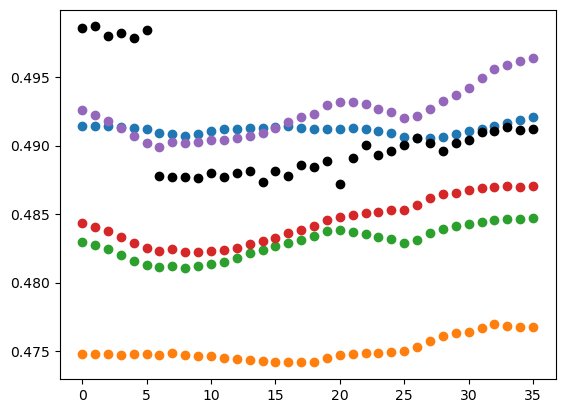

In [14]:
l_x_shaft = [i for i in range(len(X_test))]

for i in range(5):
    plt.scatter(l_x_shaft, dnn.predict(model_list[i](X_test), verbose=0))

plt.scatter(l_x_shaft, dnn.predict(y_test, verbose=0), c='black')
plt.show()

In [15]:
d_x_shaft = [i for i in range(0, len(a), 12)]
d_y = []
for i in range(0, len(a), 12):
    d_y.append(a[i].reshape(1, 21))

y = []
for i in d_y:
    y.append(dnn.predict(i))

1/1 [==============================] - 0s 17ms/step


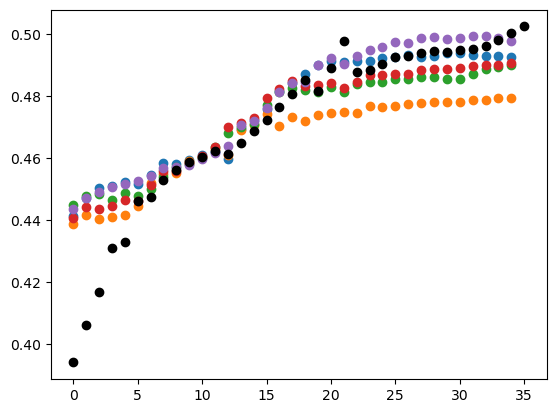

In [16]:
l_x_shaft = [i for i in range(len(b))]
l_y_shaft = [i for i in range(len(y))]

for i in range(5):
    plt.scatter(l_x_shaft, dnn.predict(model_list[i](b), verbose=0))

plt.scatter(l_y_shaft, y, c='black')
plt.show()